In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
fmnist = keras.datasets.fashion_mnist
type(fmnist)

module

In [15]:
(train_im, train_lb), (test_im, test_lb) = fmnist.load_data()

train_im = train_im / 255.
test_im = test_im / 255.

In [18]:
%%time

model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
print(f'\nTraining:\n')
model.fit(train_im, train_lb, epochs=5)

print(f'\nTesting:\n')
model.evaluate(test_im, test_lb)


Training:

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5040 - accuracy: 0.8238
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3771 - accuracy: 0.8645
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3385 - accuracy: 0.8771
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3122 - accuracy: 0.8861
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2962 - accuracy: 0.8909

Testing:

313/313 [==============================] - 1s 1ms/step - loss: 0.3520 - accuracy: 0.8713
CPU times: total: 39.3 s
Wall time: 16.8 s


[0.35199832916259766, 0.8712999820709229]

In [19]:
%%time

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.summary()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print(f'\nTraining:\n')
model.fit(train_im, train_lb, epochs=5)

print(f'\nTesting:\n')
model.evaluate(test_im, test_lb)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 800)               0         
                                                                 
 dense_6 (Dense)             (None, 128)              

[0.2968398630619049, 0.892300009727478]

In [20]:
%%time

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.summary()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print(f'\nTraining:\n')
model.fit(train_im, train_lb, epochs=15)

print(f'\nTesting:\n')
model.evaluate(test_im, test_lb)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 800)               0         
                                                                 
 dense_8 (Dense)             (None, 128)              

[0.3475169837474823, 0.9034000039100647]

In [26]:
print(test_lb[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


In [53]:
def view_conv(imgs, conv):
    conv_model = keras.models.Model(
        inputs=model.inputs,
        outputs=[l.output for l in model.layers][0:4]
    )
    ls_out = conv_model.predict(test_im[imgs][:, :, :, np.newaxis])
    
    fig, axs = plt.subplots(
        len(imgs), 4, sharex='col', sharey='col', figsize=[10, len(imgs)*3]
    )
    for j, l_out in enumerate(ls_out):
        for i, l in enumerate(l_out):
            axs[i, j].imshow(l[:, :, conv], cmap='inferno')

In [57]:
np.where(test_lb[:100]==9)

(array([ 0, 23, 28, 39, 68, 83], dtype=int64),)

1/1 [==============================] - 0s 62ms/step


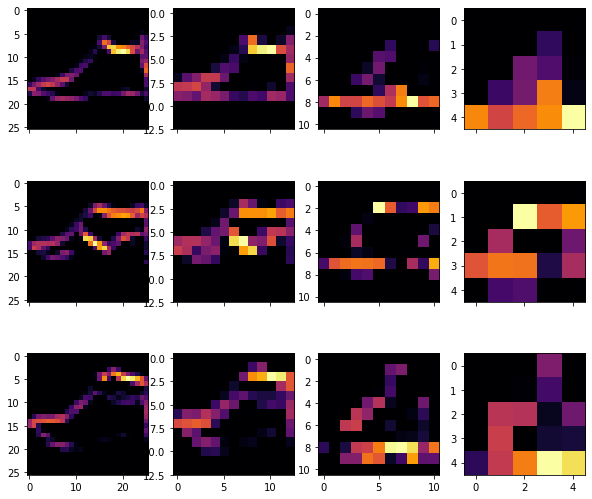

In [55]:
view_conv([0, 23, 28], 2)

In [58]:
np.where(test_lb[:100]==1)

(array([ 2,  3,  5, 15, 24, 41, 47, 64, 65, 76, 80, 94, 97], dtype=int64),)

1/1 [==============================] - 0s 69ms/step


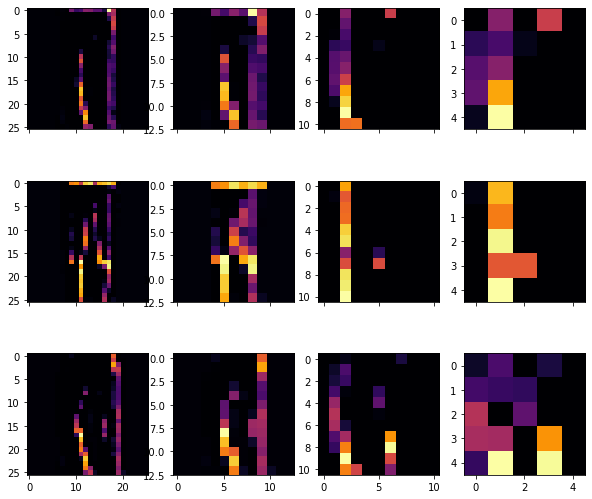

In [63]:
view_conv([2, 3, 5], 0)

In [64]:
np.where(test_lb[:100]==2)

(array([ 1, 16, 20, 46, 48, 49, 54, 55, 66, 72, 74, 77, 87, 99],
       dtype=int64),)

1/1 [==============================] - 0s 58ms/step


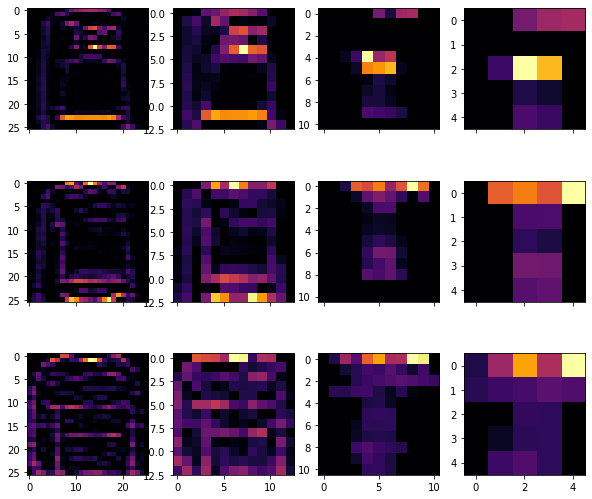

In [72]:
view_conv([1, 16, 20], 9)

1/1 [==============================] - 0s 61ms/step


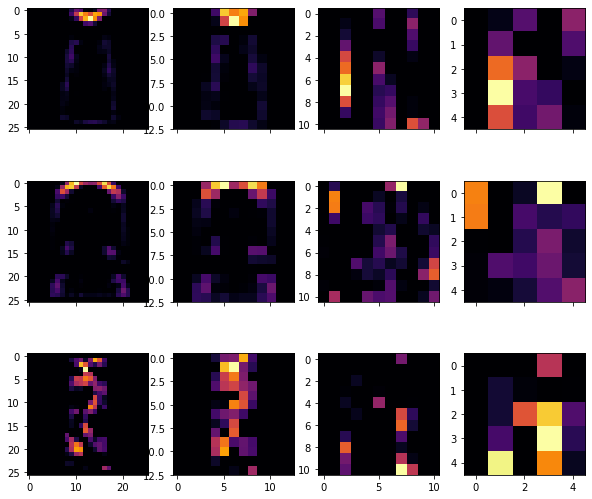

In [75]:
view_conv(np.where(test_lb==3)[0][:3], 16)

## Exercise 1: Number of filters

In [77]:
%%time

model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(16, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.summary()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print(f'\nTraining:\n')
model.fit(train_im, train_lb, epochs=5)

print(f'\nTesting:\n')
model.evaluate(test_im, test_lb)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 400)               0         
                                                                 
 dense_12 (Dense)            (None, 128)              

[0.29470470547676086, 0.8950999975204468]

In [78]:
%%time

model = keras.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.summary()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print(f'\nTraining:\n')
model.fit(train_im, train_lb, epochs=5)

print(f'\nTesting:\n')
model.evaluate(test_im, test_lb)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 1600)              0         
                                                                 
 dense_14 (Dense)            (None, 128)              

[0.2464715540409088, 0.9135000109672546]

## Exercise 2: Fewer convolution layers

In [79]:
%%time

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.summary()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print(f'\nTraining:\n')
model.fit(train_im, train_lb, epochs=5)

print(f'\nTesting:\n')
model.evaluate(test_im, test_lb)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 5408)              0         
                                                                 
 dense_16 (Dense)            (None, 128)               692352    
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

[0.25005313754081726, 0.914900004863739]

## Exercise 3: More convolution layers

In [80]:
%%time

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.summary()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print(f'\nTraining:\n')
model.fit(train_im, train_lb, epochs=5)

print(f'\nTesting:\n')
model.evaluate(test_im, test_lb)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 1, 1, 32)        

[0.3551141321659088, 0.8730000257492065]

## Exercise 5: Early stopping by callbacks

In [82]:
class MyCallback(keras.callbacks.Callback):
    def __init__(self, ac_cap=1):
        super().__init__()
        self.ac_cap = ac_cap
        
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy', 0) >= self.ac_cap:
            print(f'\n\nReached {self.ac_cap*100:.1f}% accuracy so cancel training!\n')
            self.model.stop_training = True

In [83]:
%%time

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.summary()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print(f'\nTraining:\n')
model.fit(train_im, train_lb, epochs=5, callbacks=[MyCallback(ac_cap=0.92)])

print(f'\nTesting:\n')
model.evaluate(test_im, test_lb)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 5408)              0         
                                                                 
 dense_20 (Dense)            (None, 128)               692352    
                                                                 
 dense_21 (Dense)            (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_______________________________________________

[0.2668384909629822, 0.9028000235557556]